# Objective:
The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.

# Dataset
The data contains information on web sessions of a customer:

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

# Bounce Rate:
The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

# Exit Rate:
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

Dataset has average bounce rates and exit rates for a page customer landed on.

Read more about Bounce Rate vs Exit Rate here

# Page Value: 
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
Read more about Page Value here.

# Special Day:
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
The dataset also includes the operating system, browser, region, traffic type - these values are masked.

# VisitorType: 
returning visitor, new visitor, or other types of customer.

# weekend: 
a Boolean value indicating whether the date of the visit is weekend or not

month: month of the year

# Context:

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. This is a transactional data set that contains all the transactions occurring in online retail. Ecommerce data is information relating to the visitors and performance of an online shop. It's mostly used by marketers e.g. in understanding consumer behavior and enhancing conversion funnels.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
import sklearn

In [3]:
shoppers = pd.read_csv("online_shoppers_intention.csv")

In [4]:
# copying data to another variable to avoid any changes to original data

data = shoppers.copy()


In [5]:
data.tail(10)

Administrative  Administrative_Duration  Informational  \
12320               0                     0.00              0   
12321               0                     0.00              0   
12322               6                    76.25              0   
12323               2                    64.75              0   
12324               0                     0.00              1   
12325               3                   145.00              0   
12326               0                     0.00              0   
12327               0                     0.00              0   
12328               4                    75.00              0   
12329               0                     0.00              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12320                     0.0               8               143.583333   
12321                     0.0               6                 0.000000   
12322                     0.0              22              1075.250000   
12323                     0.0              44              1157.976190   
12324                     0.0              16               503.000000   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12320     0.014286   0.050000    0.000000         0.0   Nov                 2   
12321     0.200000   0.200000    0.000000         0.0   Nov                 1   
12322     0.000000   0.004167    0.000000         0.0   Dec                 2   
12323     0.000000   0.013953    0.000000         0.0   Nov                 2   
12324     0.000000   0.037647    0.000000         0.0   Nov                 2   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12320        2       3            1  Returning_Visitor    False    False  
12321        8       4            1  Returning_Visitor    False    False  
12322        2       4            2  Returning_Visitor    False    False  
12323        2       1           10  Returning_Visitor    False    False  
12324        2       1            1  Returning_Visitor    False    False  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False

In [6]:
data.shape

(12330, 18)

data has 12330 rows and 18 columns

In [7]:
data.size

221940

In [8]:
# check for duplicate values and if exists, remove them.

data[data.duplicated()].count()

Administrative             125
Administrative_Duration    125
Informational              125
Informational_Duration     125
ProductRelated             125
ProductRelated_Duration    125
BounceRates                125
ExitRates                  125
PageValues                 125
SpecialDay                 125
Month                      125
OperatingSystems           125
Browser                    125
Region                     125
TrafficType                125
VisitorType                125
Weekend                    125
Revenue                    125
dtype: int64

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

# insights

- most columns are of integer or float type.
- last two columns weekend and revenue are of bool type.
- month and visitortype columns are of object type so we have to convert them into suitable data type 
before feeding them into model.



 # important

- we convert categorical datatype using label-encoding or one-hot encoding
- in python, for bool, true and false are implicitly cast into integers.
-  True == 1, False == 0 --> this means that an algorithm running in pure python should work without conversion.



# month and visitortype are of object dtype so we can change them into categories

- converting object to category reduces the data space required to store the dataframe

In [11]:
data['Month'] = data['Month'].astype("category")
data['VisitorType'] = data['VisitorType'].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  int64   
 12  Browser                  12205 non-null  int64   
 13  Region                   12205 non-null  int64   
 14  Traffi

In [13]:
#check for missing values

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

there are no missing values in the data

In [14]:
# statistical summary of dataset

data.describe().T

count         mean          std  min         25%  \
Administrative           12205.0     2.338878     3.330436  0.0    0.000000   
Administrative_Duration  12205.0    81.646331   177.491845  0.0    0.000000   
Informational            12205.0     0.508726     1.275617  0.0    0.000000   
Informational_Duration   12205.0    34.825454   141.424807  0.0    0.000000   
ProductRelated           12205.0    32.045637    44.593649  0.0    8.000000   
ProductRelated_Duration  12205.0  1206.982457  1919.601400  0.0  193.000000   
BounceRates              12205.0     0.020370     0.045255  0.0    0.000000   
ExitRates                12205.0     0.041466     0.046163  0.0    0.014231   
PageValues               12205.0     5.949574    18.653671  0.0    0.000000   
SpecialDay               12205.0     0.061942     0.199666  0.0    0.000000   
OperatingSystems         12205.0     2.124211     0.906823  1.0    2.000000   
Browser                  12205.0     2.357804     1.710114  1.0    2.000000   
Region                   12205.0     3.153298     2.402340  1.0    1.000000   
TrafficType              12205.0     4.073904     4.016654  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    9.000000    94.700000   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  608.942857  1477.154762  63973.522230  
BounceRates                0.002899     0.016667      0.200000  
ExitRates                  0.025000     0.048529      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

In [15]:
data.describe(include = ['category','bool']).T

count unique                top   freq
Month        12205     10                May   3329
VisitorType  12205      3  Returning_Visitor  10431
Weekend      12205      2              False   9346
Revenue      12205      2              False  10297

- month has 10 unique values , visitor type has 3 unique values with most commonly occurring value as returning_visitor

In [16]:
data['Month'].unique()

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Aug', 'Dec', 'Feb', 'Jul', ..., 'May', 'Nov', 'Oct', 'Sep']

In [17]:
data['VisitorType'].unique()

['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['New_Visitor', 'Other', 'Returning_Visitor']

In [18]:
data['Weekend'].unique()

array([False,  True])

In [19]:
data['Revenue'].unique()

array([False,  True])

- month data includes 10 unique values. The data has no information regarding January and April month.
- website has most active members in may.
- most visitors are returning type customers which is profitable for business.
- most traffic on website occurs on weekdays.
- website is making revenue from a small portion of customers.



# EDA exploratory data analysis

- univariate analysis

In [20]:
# univariate anaysis of numerical variables used for studying central tendency and dispersion.
# a function for creating box plots and histogram for any input numerical variable .
# this function takes the numerical column as input and returned the boxplots and histograms for the variable.
""" Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)"""
def histogram_boxplot(feature,figsize = (10,5),bins = None):
    f2,(ax_box2,ax_hist2) = plt.subplots(nrows = 2, # numbers of rows of subplot grid
                                            sharex = True, #x-axis will be shared among all subplots
                                             gridspec_kw = {"height_ratios":(.25,.75)}, #relative height of the two subplots 
                                             figsize = figsize ) # creating the two subplots
        
        
    sns.boxplot(feature,ax = ax_box2,showmeans = True,color = 'violet',orient = 'h')
        # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature,kde = False,ax = ax_hist2,bins = bins, palette = 'winter') if bins else sns.distplot(feature,kde = False,ax = ax_hist2)# For histogram
    ax_hist2.axvline(np.mean(feature),color = 'green',linestyle = '--') # add mean to histogram
    ax_hist2.axvline(np.median(feature),color = 'black',linestyle = '-') #add median to histogram
        

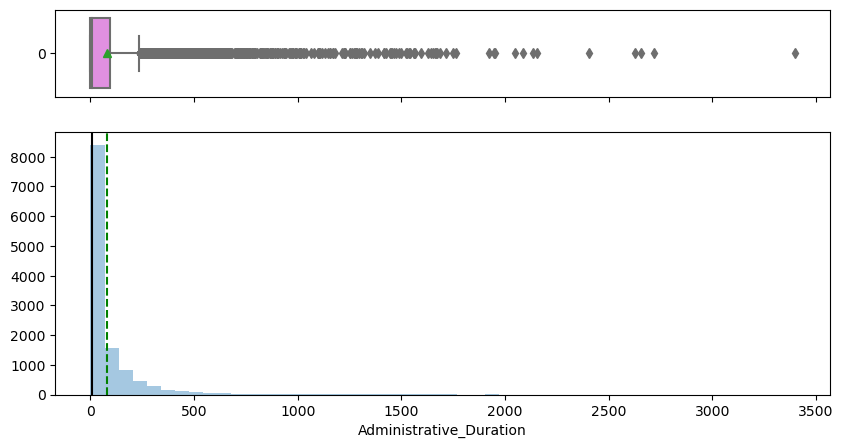

In [21]:
histogram_boxplot(data['Administrative_Duration'])

- the distribution of administrative duration is right-skewed.
- there are outliers in this variable.
- from the boxplot we can see that the third quartile is equal to 94 
which means 75% of customers stay less than 94 seconds on administrative pages in a session

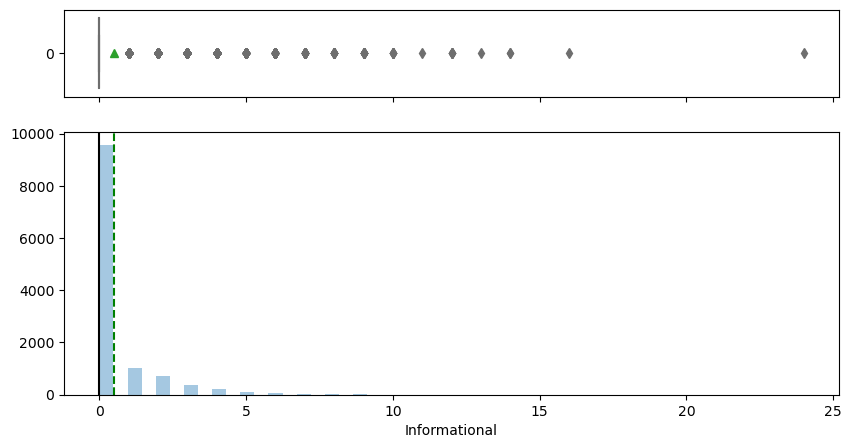

In [22]:
histogram_boxplot(data['Informational'])

- very few customers have visited the informational page
- there are outliers
- the data is right skewed

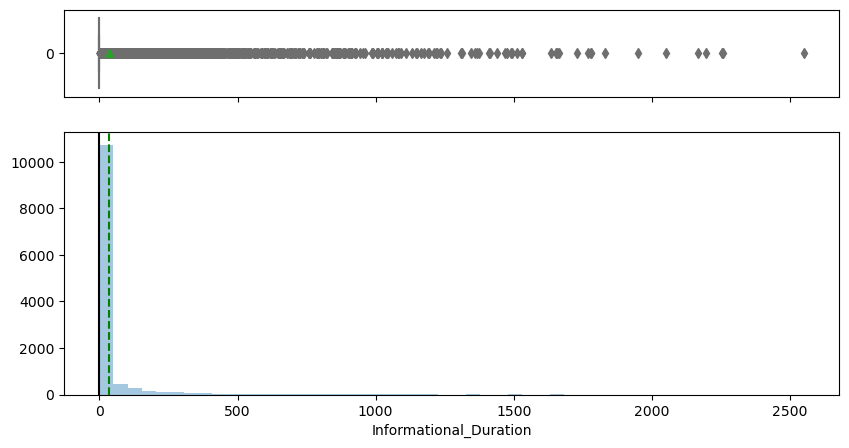

In [23]:
histogram_boxplot(data['Informational_Duration'])

- the data is right skewed
- outliers are present
- on average, customers have spent 35 seconds on informational page.

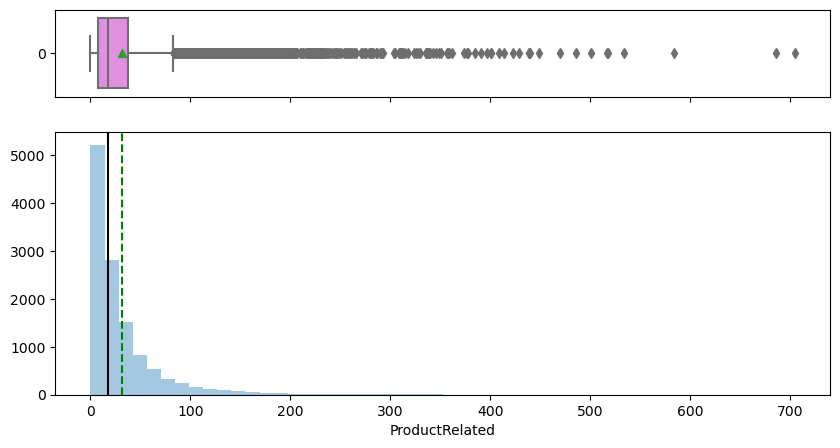

In [24]:
histogram_boxplot(data['ProductRelated'])

 - The distribution of ProductRelated is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages.

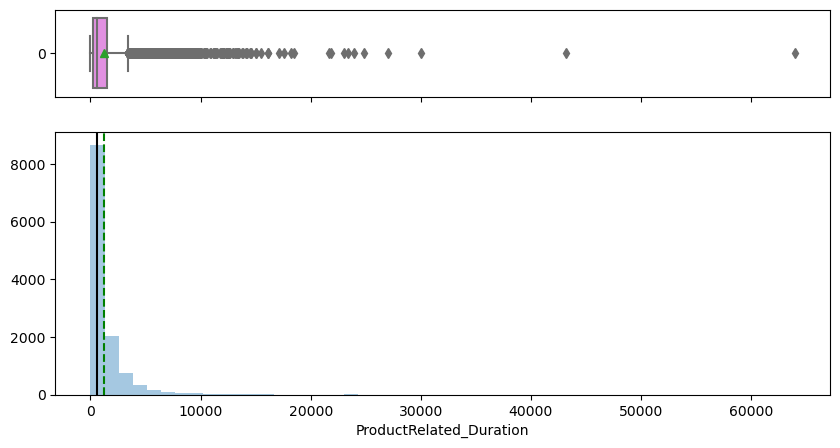

In [25]:
histogram_boxplot(data['ProductRelated_Duration'])

In [26]:
np.mean(data['ProductRelated_Duration'])

1206.9824573712112

- outliers are present
- distribution is right skewed.
- on avg, customers have spent 1206 seconds on product related page that is higher than administrative and information page.

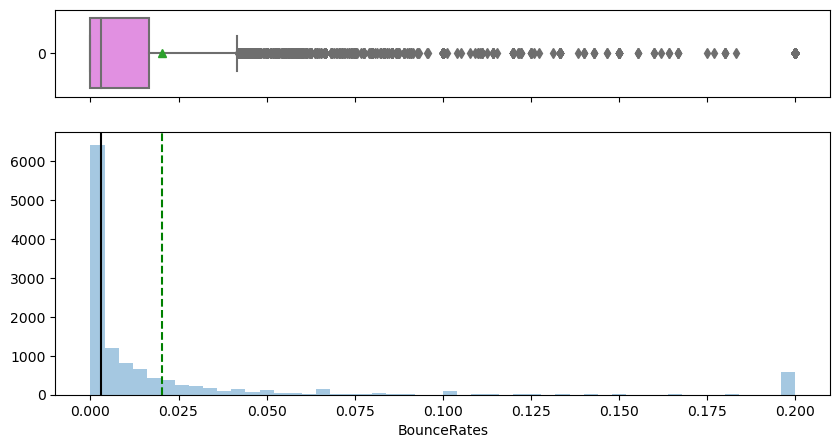

In [27]:
histogram_boxplot(data['BounceRates'])

* The distribution of BounceRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.022.

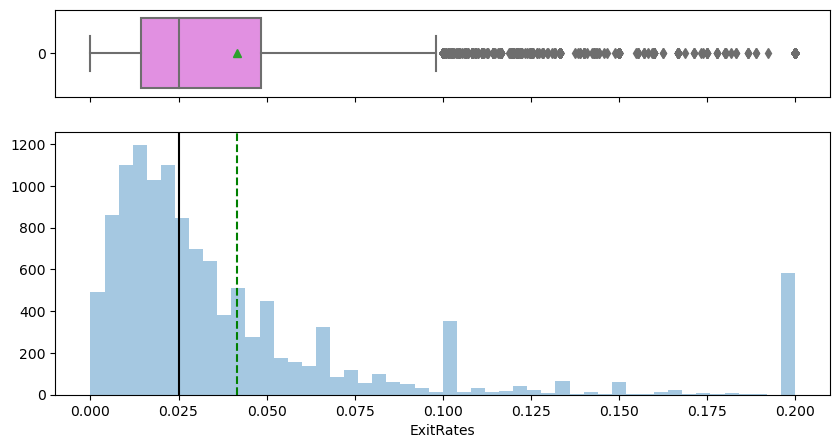

In [28]:
histogram_boxplot(data['ExitRates'])

 - The distribution of ExitRates is right-skewed.
 - There are outliers in this variable.
 - On average the bounce rate of a webpage is 0.041.

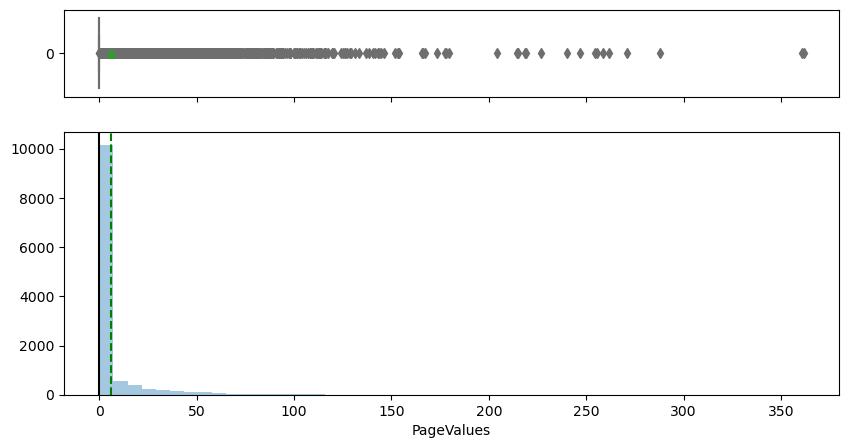

In [29]:
histogram_boxplot(data['PageValues'])

In [30]:
np.mean(data['PageValues'])

5.94957389979615

- highly skewed towards right
- it has many outliers
- on avg , a customer visits 6 pages before finally landing transaction page

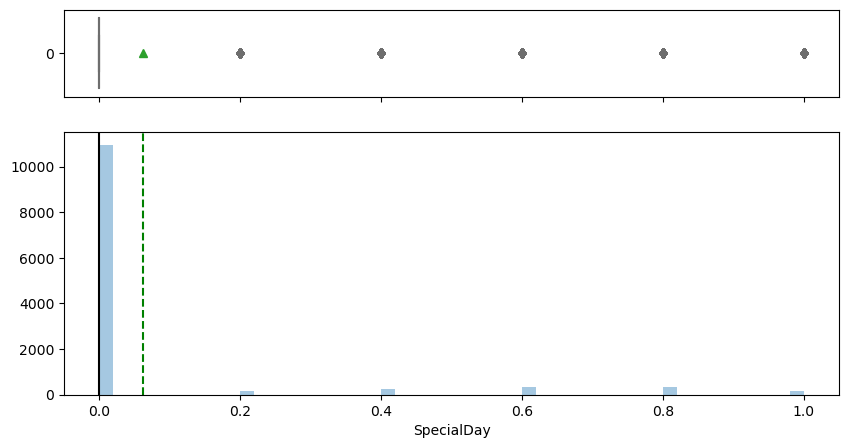

In [31]:
histogram_boxplot(data['SpecialDay'])

In [32]:
np.mean(data['SpecialDay'])

0.06194182712003277

- this distribution suggests we must look into this column as a category for more information.
- most customers have visited website on days that were not close to special occasion.


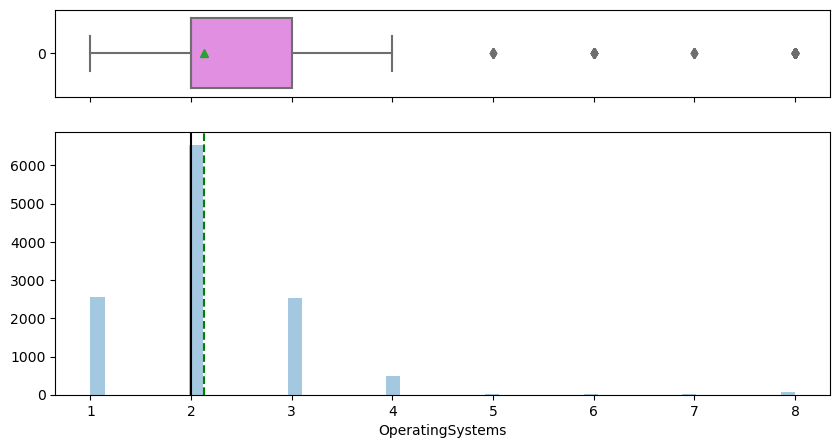

In [33]:
histogram_boxplot(data['OperatingSystems'])

In [34]:
np.mean(data['OperatingSystems'])

2.124211388775092

- distribution suggests most of the customers use the website via 2nd operating system.
- values are masked so they are difficult to comment on.
- we should look at it as a category to extract more information.

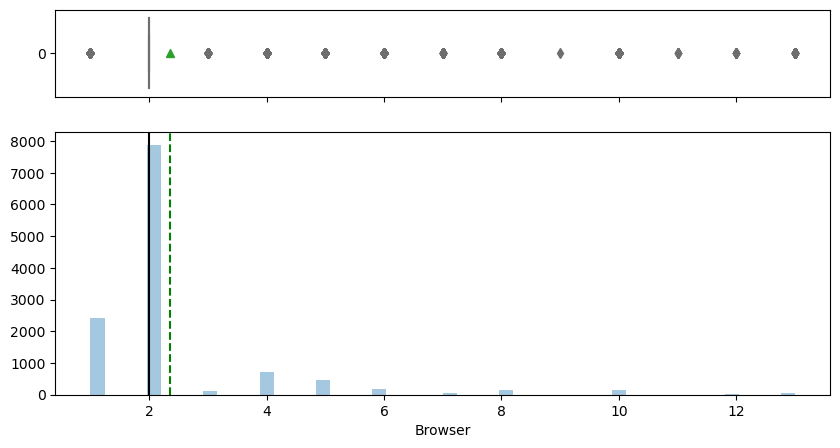

In [35]:
histogram_boxplot(data['Browser'])

- distribution suggests that most customers visit website using 2nd browser.
- values are so masked that it is difficult to comment on them.
- we should look at it as a category to extract more information.

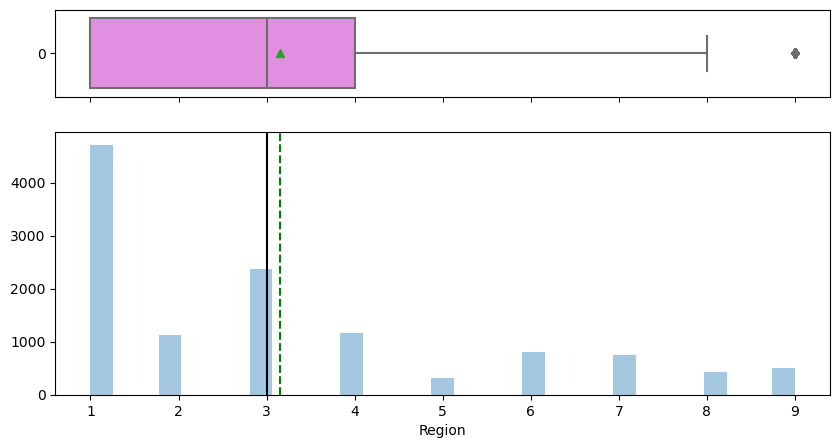

In [36]:
histogram_boxplot(data['Region'])

- most of the customers visit website from region 1.
- values are so masked so it is difficult to comment on it.
- distribution of region also suggests we should look at it as a category to extract more information.

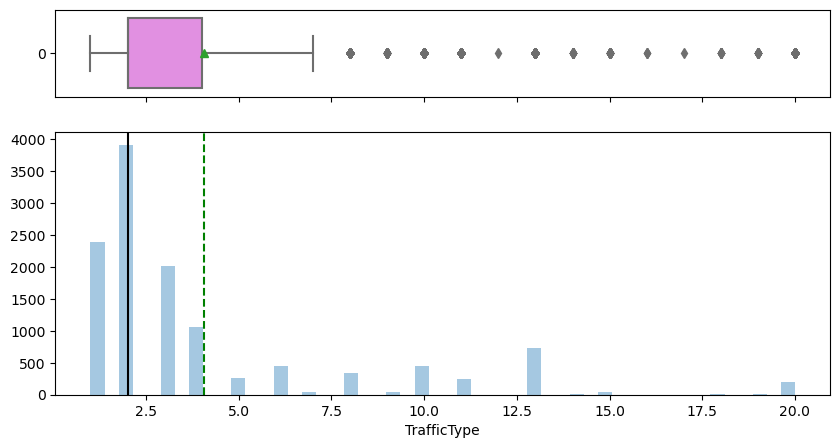

In [37]:
histogram_boxplot(data['TrafficType'])

- the distribution shows most of the type of traffic the websuite gets is 2.
- these values are so masked that it is difficult to comment on it.
- we should look at it as a category to extract more data.

In [38]:
# function to create bar plots that indicate percentage for each category.
''' 
    plot 
    feature : categorical feature
    the function won't work if passed in hue parameter
'''
def perc_on_bar(plot,feature):
    total = len(feature) # length 0f column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                   # width of the plot
        y = p.get_y() + p.get_height()                           # height of the plot
        ax.annotate(percentage, (x,y),size = 12)                  # annotate the percentage
    plt.show()                                              #show the plot
        

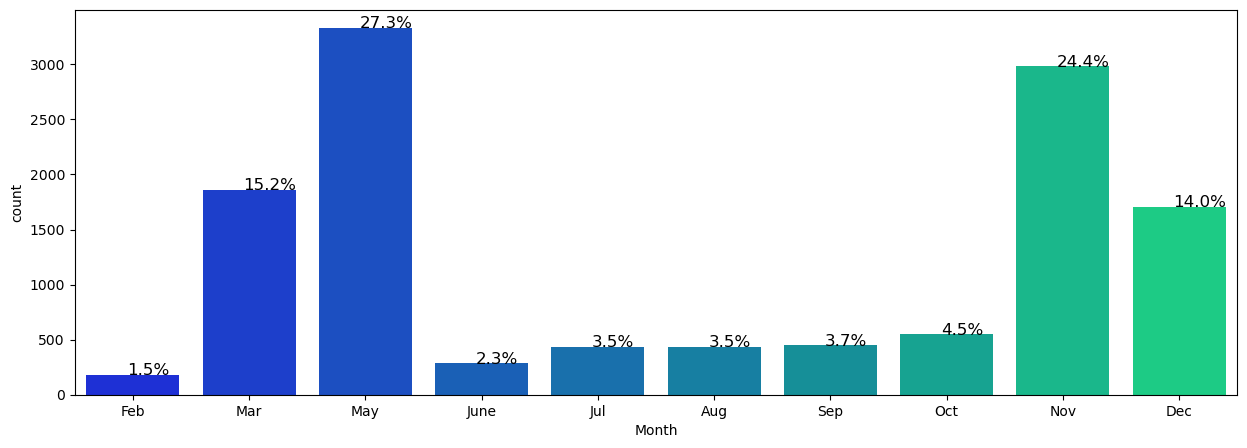

In [39]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["Month"],palette = 'winter',order = ['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
perc_on_bar(ax,data['Month'])


- most of the sales occured in march and may


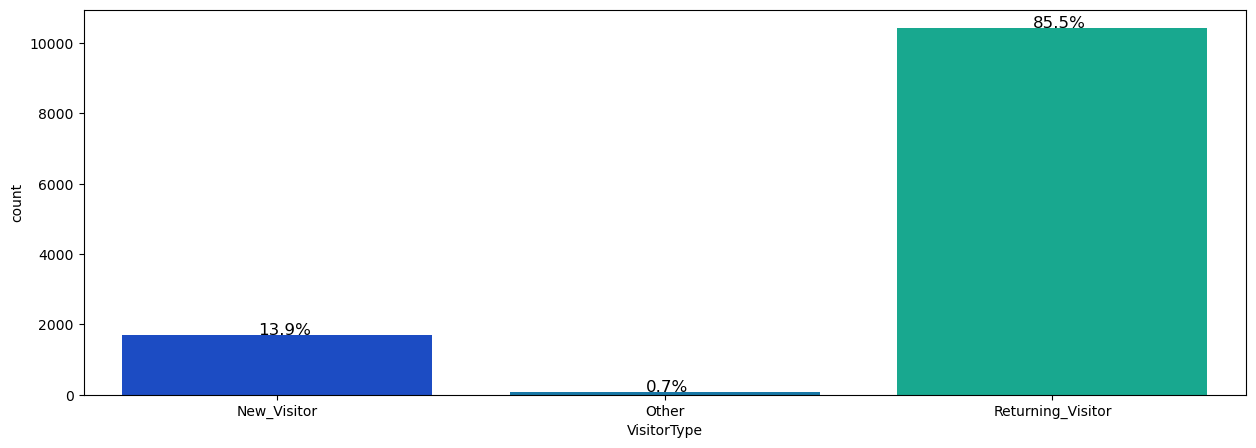

In [40]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["VisitorType"],palette = 'winter')
perc_on_bar(ax,data['VisitorType'])

- 85.5% are returning visitors that are the maximum among all, indicating the website has a loyal base of customers.
- during these 10 minths of observation, 13.9% of the customers are visiting the website.

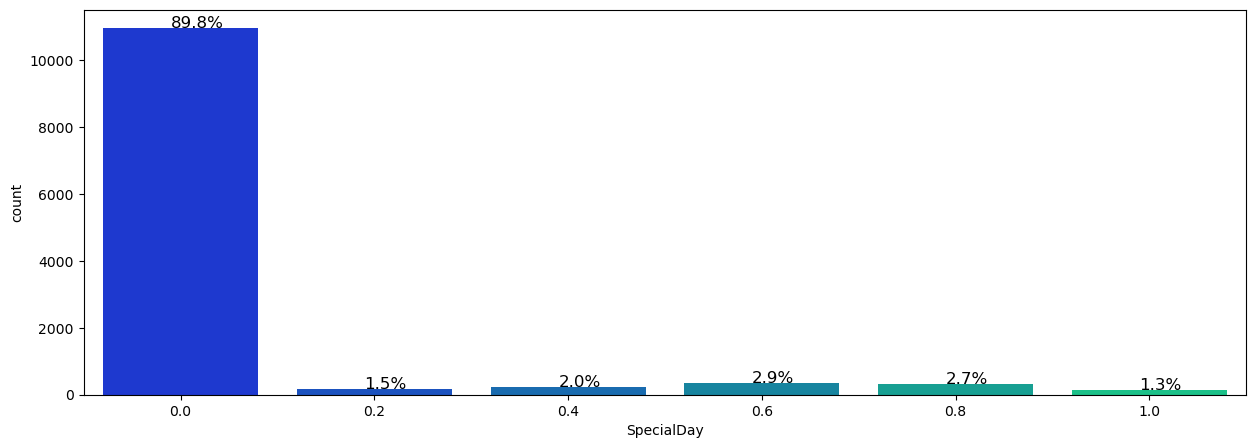

In [41]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["SpecialDay"],palette = 'winter')
perc_on_bar(ax,data['SpecialDay'])

- 89.8% sessions are on non-special days.

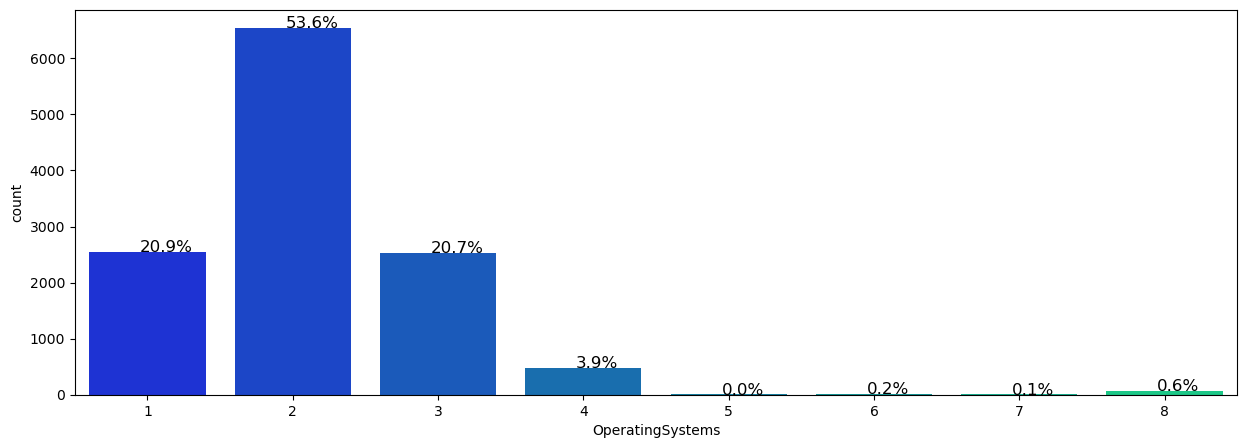

In [42]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["OperatingSystems"],palette = 'winter')
perc_on_bar(ax,data['OperatingSystems'])

- 53.6% customers perefer type 2 operating system for accessing the website.

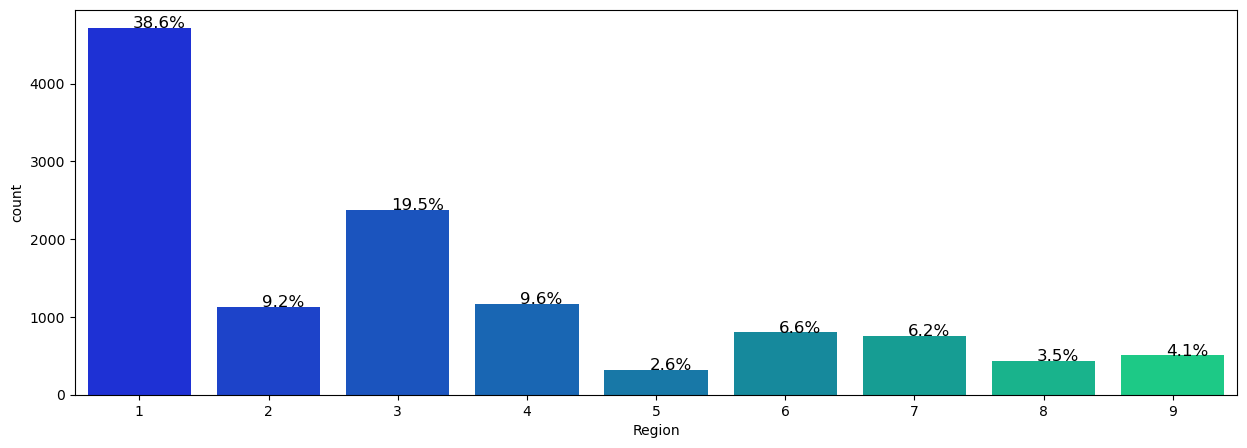

In [43]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["Region"],palette = 'winter')
perc_on_bar(ax,data['Region'])

- 38.6% region from where most customers access the website is region 1.

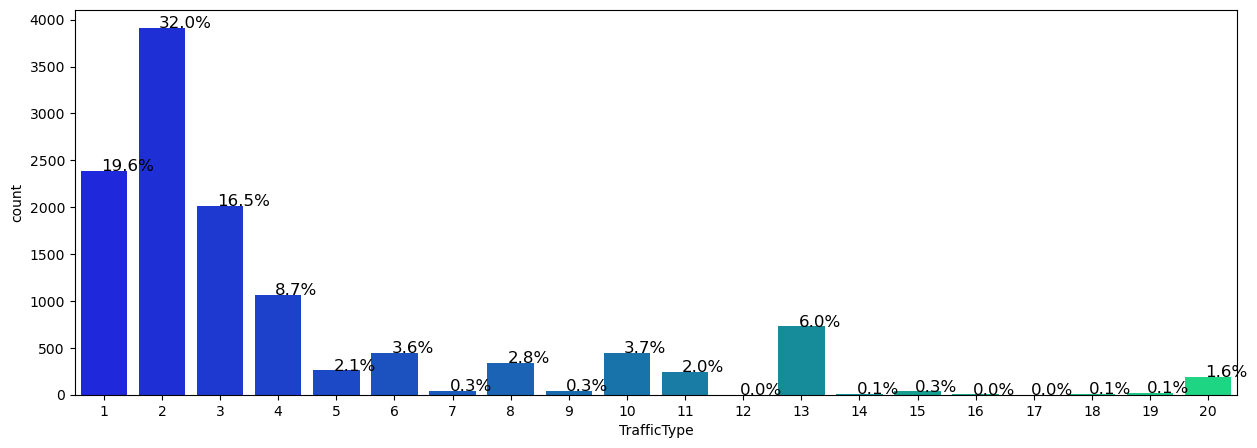

In [44]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["TrafficType"],palette = 'winter')
perc_on_bar(ax,data['TrafficType'])

- most common traffic type for the website is type 1 and 2

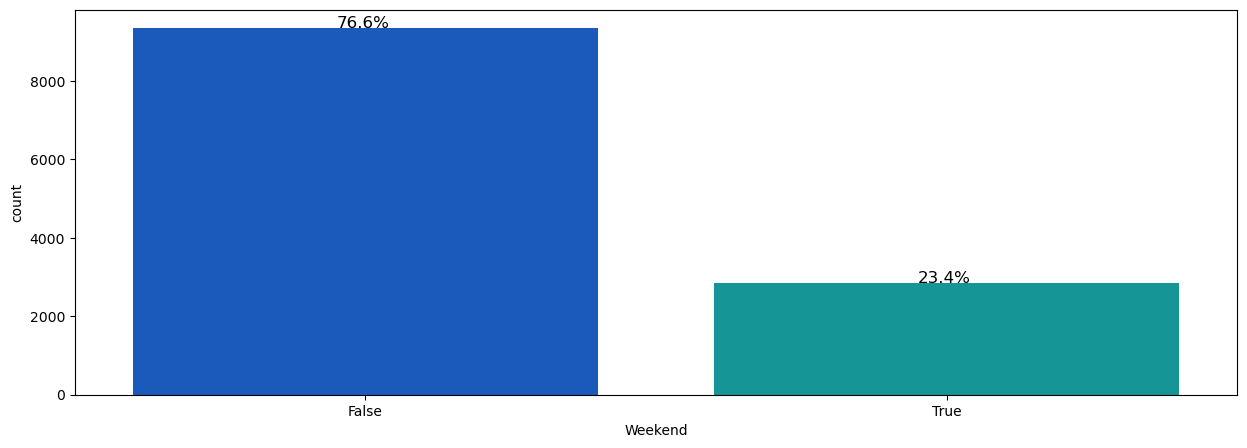

In [45]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["Weekend"],palette = 'winter')
perc_on_bar(ax,data['Weekend'])

- 76.6% customers visit the website on weekdays.

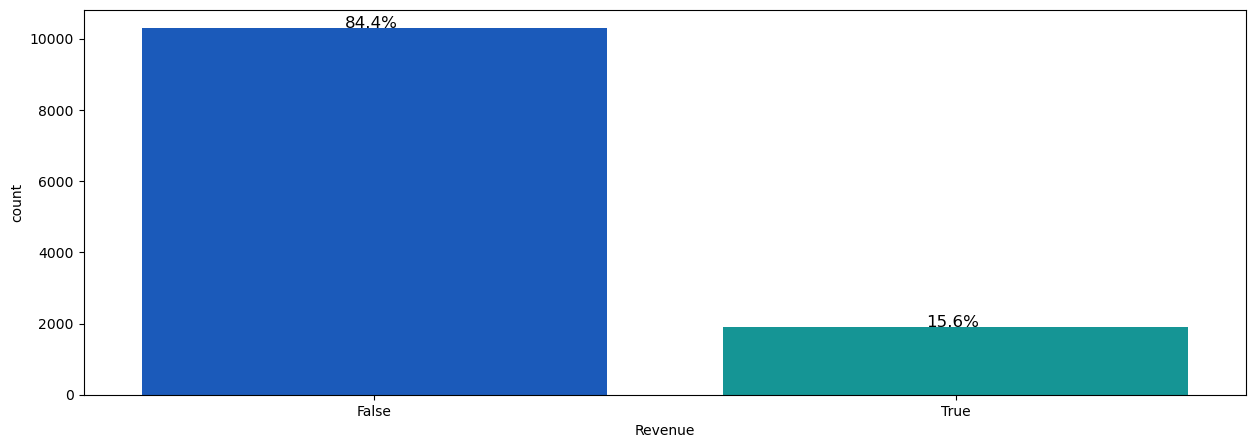

In [46]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["Revenue"],palette = 'winter')
perc_on_bar(ax,data['Revenue'])

- website is able to make revenue from only 15.6% of the customers.

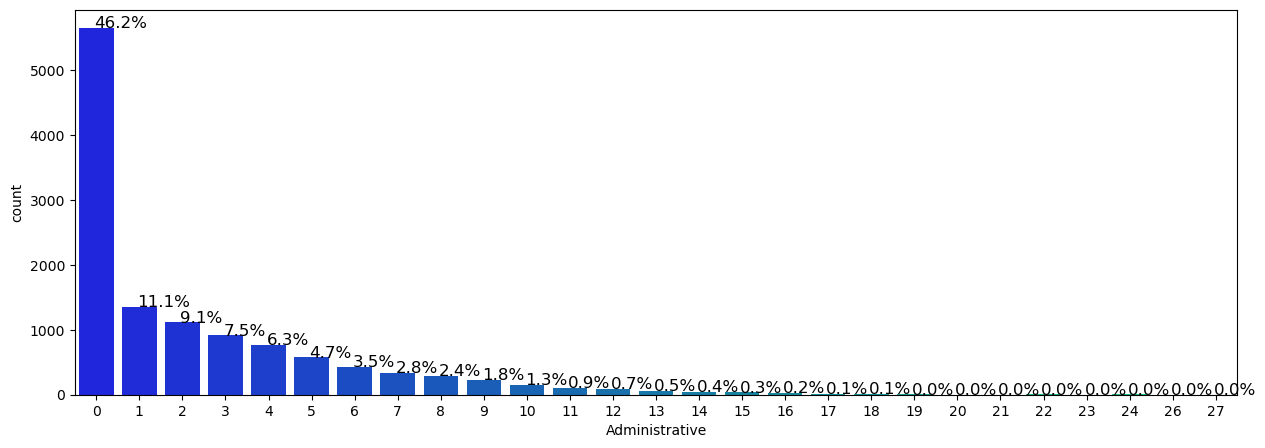

In [47]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["Administrative"],palette = 'winter')
perc_on_bar(ax,data['Administrative'])

- 46.2% customers have not visited the administrative page

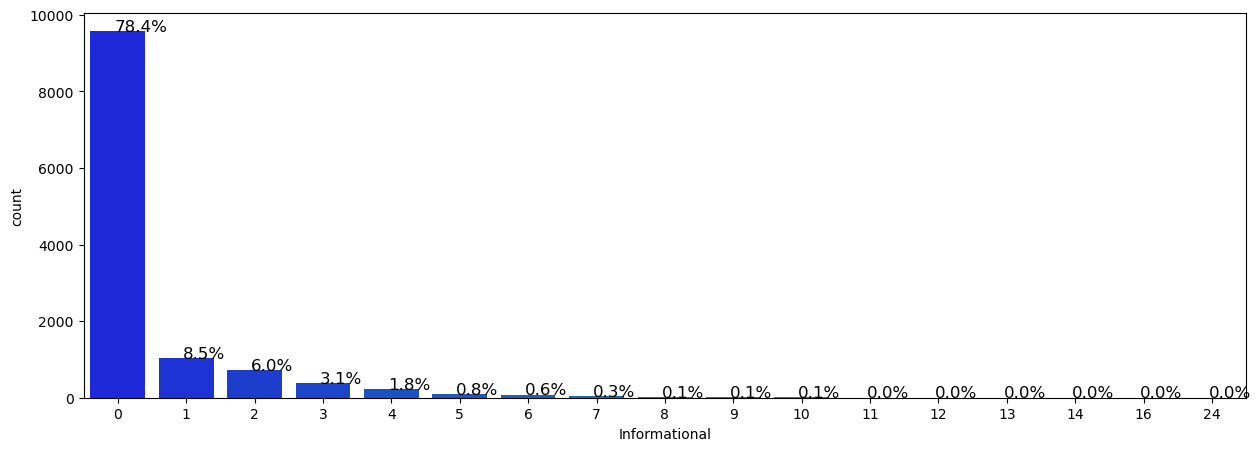

In [48]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["Informational"],palette = 'winter')
perc_on_bar(ax,data['Informational'])

#### 78.4 % customers have not visited informational page.

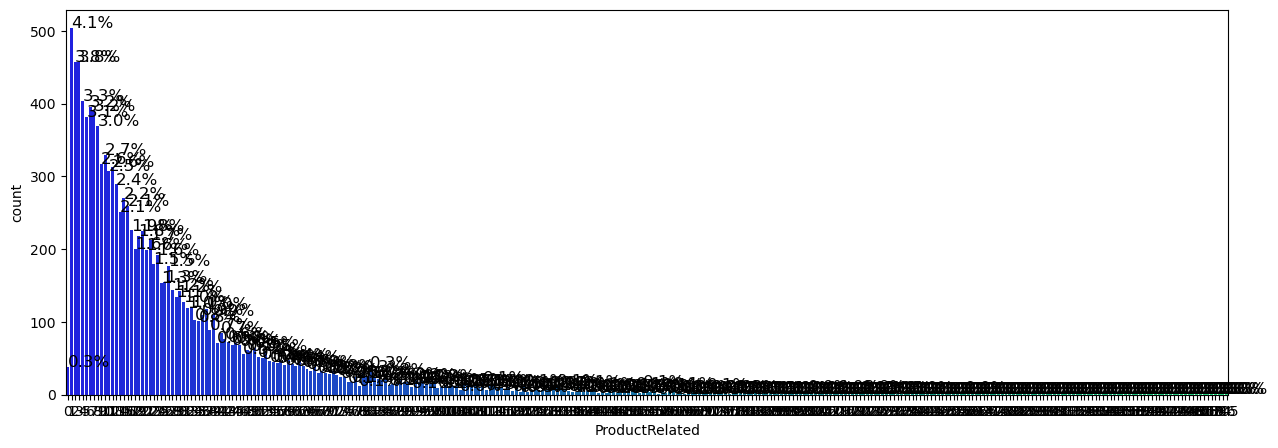

In [49]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x=data["ProductRelated"],palette = 'winter')
perc_on_bar(ax,data['ProductRelated'])

In [50]:
(len(data[data['ProductRelated'] == 0]['ProductRelated'])/len(data))*100

0.311347808275297

### only 0.3% customers have not visited product related pages.

## Bivariate analysis

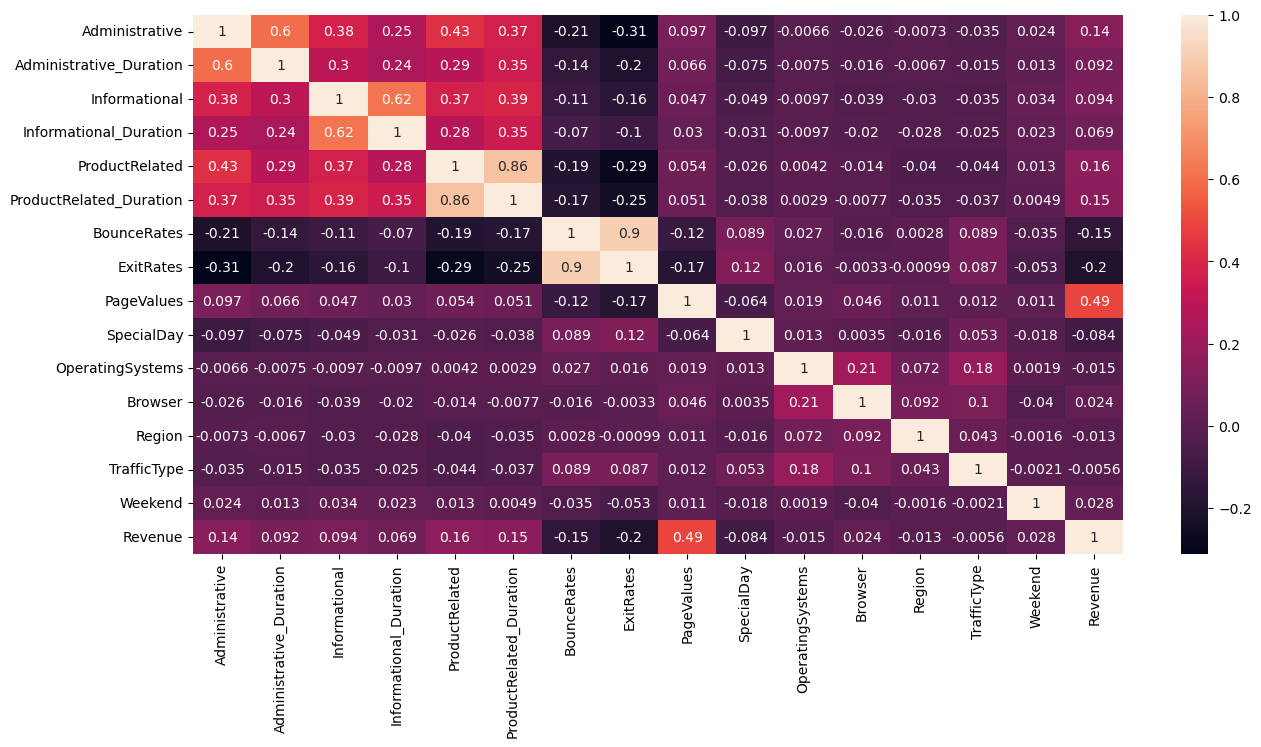

In [51]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(),annot = True)
plt.show()

- Revenue shows the highest correlation with PageValues as it takes into account the pages 
visited before reaching the transaction page.

- Administrative,Informational and ProductRelated are correlated with Administrative duration,Informational duration and
ProductRelated duration spent on them which is understandable.

- Exit rates and bounce rates are highly correlated(0.9) with each other.



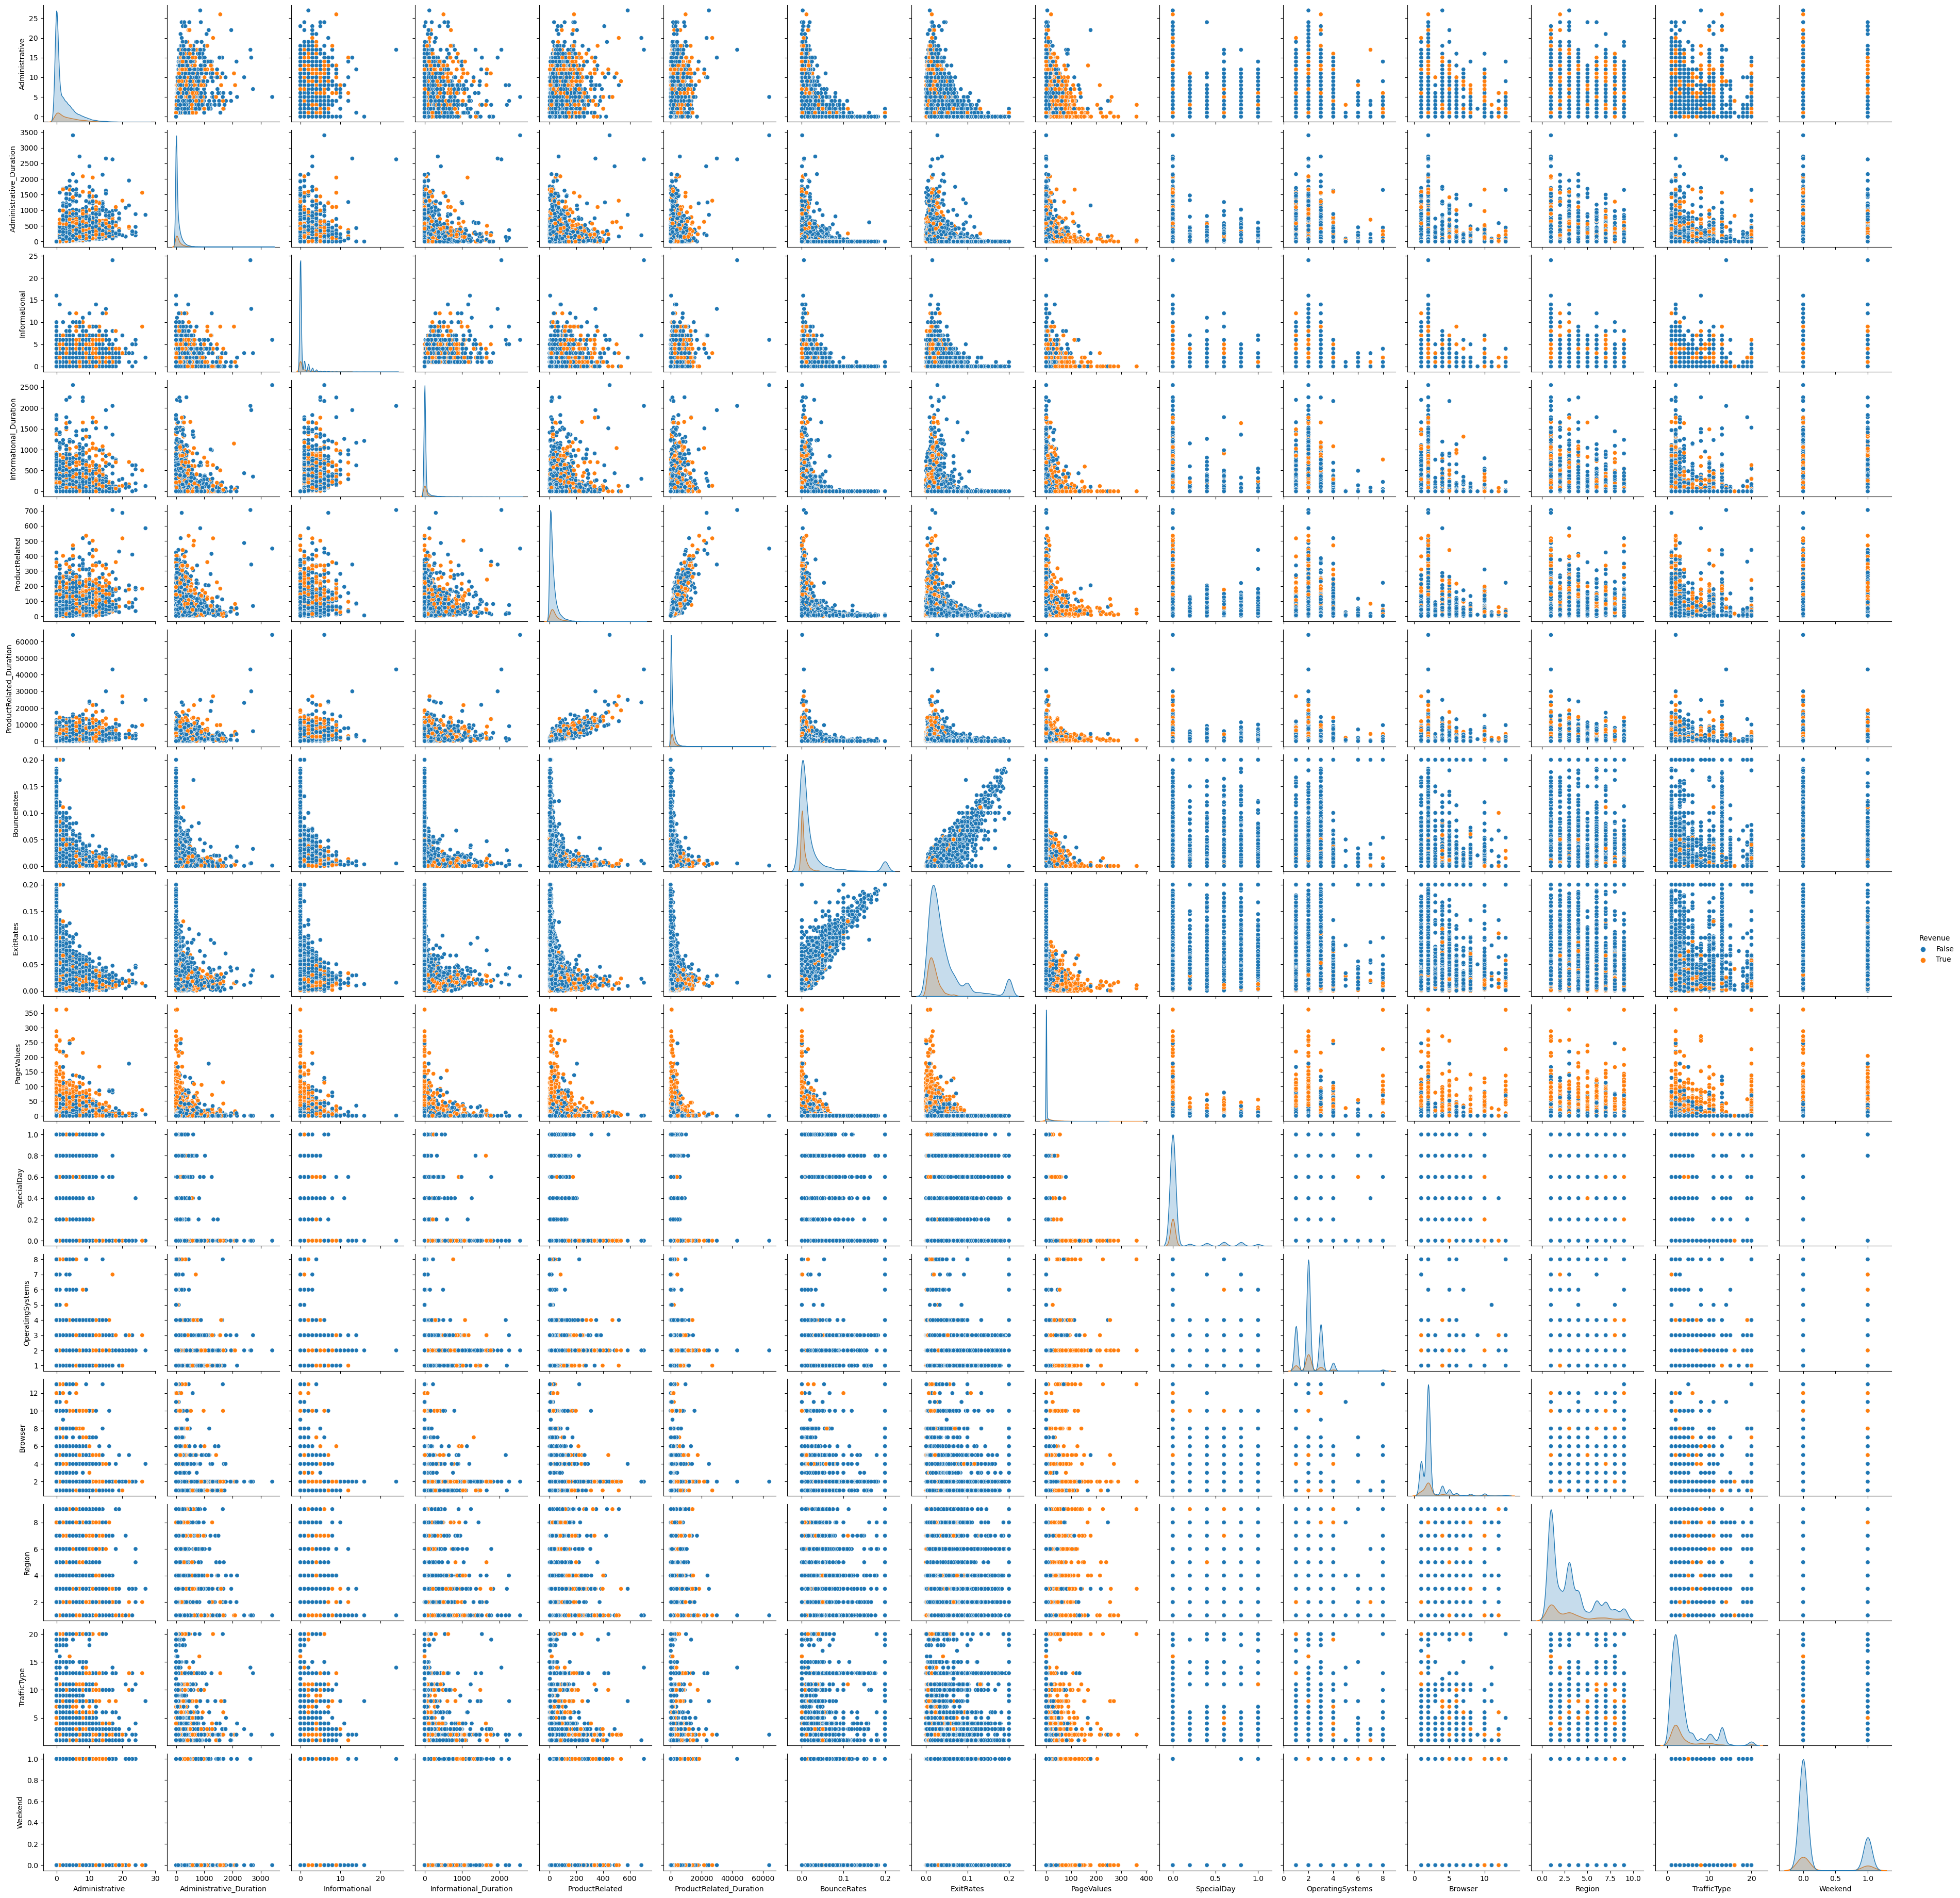

In [52]:
sns.pairplot(data = data,hue = 'Revenue')
plt.show()

- we can see varying distributions in variables for revenue , we should investigate it further.

# Revenue vs Administrative, Informational, and ProductRelated pages and time spent on these pages

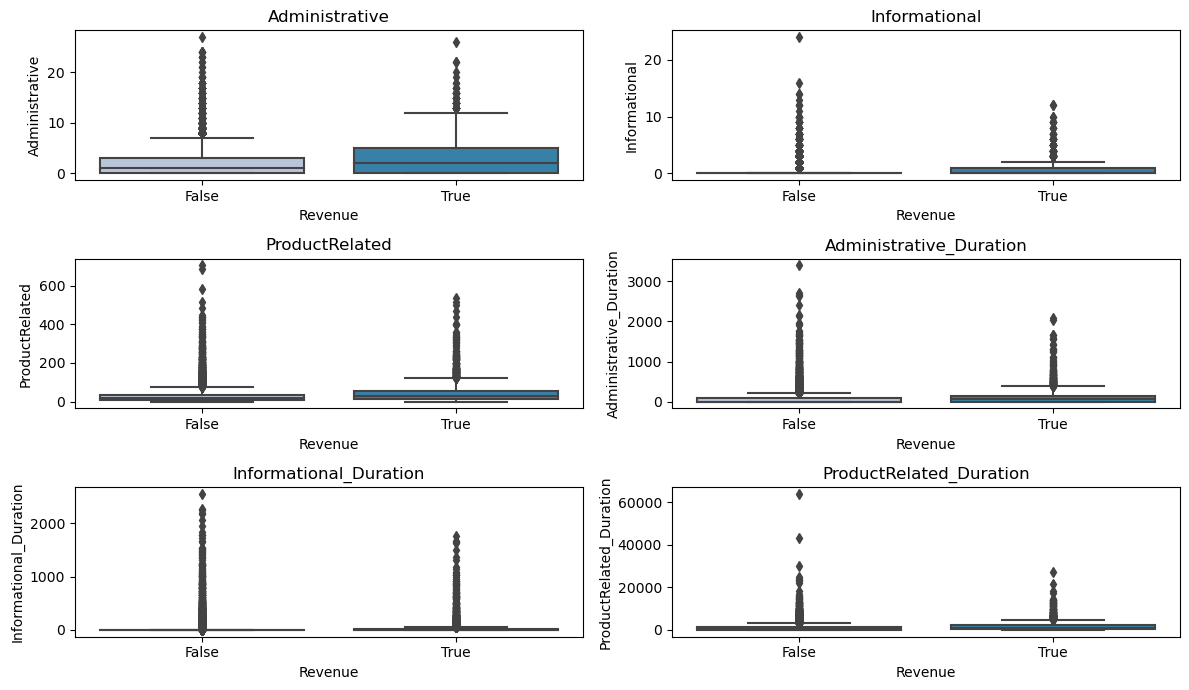

In [53]:

cols = data[['Administrative','Informational','ProductRelated','Administrative_Duration','Informational_Duration', 'ProductRelated_Duration']]

plt.figure(figsize = (12,7))
for i,variable in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x =data['Revenue'],y =data[variable],palette = 'PuBu')
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

it is difficult to interpret these boxplots because of presence of so many outliers. so, let's visualize them by removing outliers.

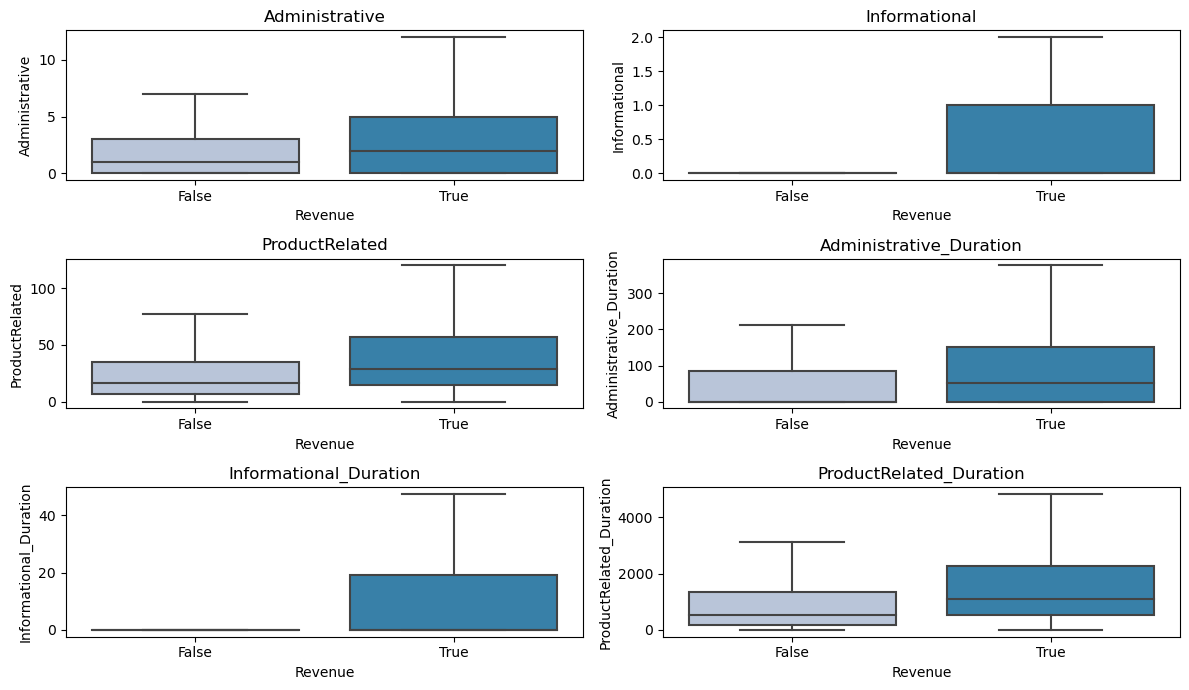

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data[['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

plt.figure(figsize=(12, 7))

# Create a 3x2 grid of subplots
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data['Revenue'], y=data[variable], palette='PuBu',showfliers = False)
    plt.title(variable)
    plt.tight_layout()

plt.show()


- customers who visited administrative,informational and product related pages more times contribute to the revenue as compared to the one's who visited less pages.
 
- Those customers who spend more time on these pages help in generating the revenue.

- But in both cases visiting the page and spending more time on pages have many outliers.

- there is clear distinction between the customers visiting more pages and spending more time on pagescontribute to the revenue.


# Revenue, vs Bounce rates and exit rates

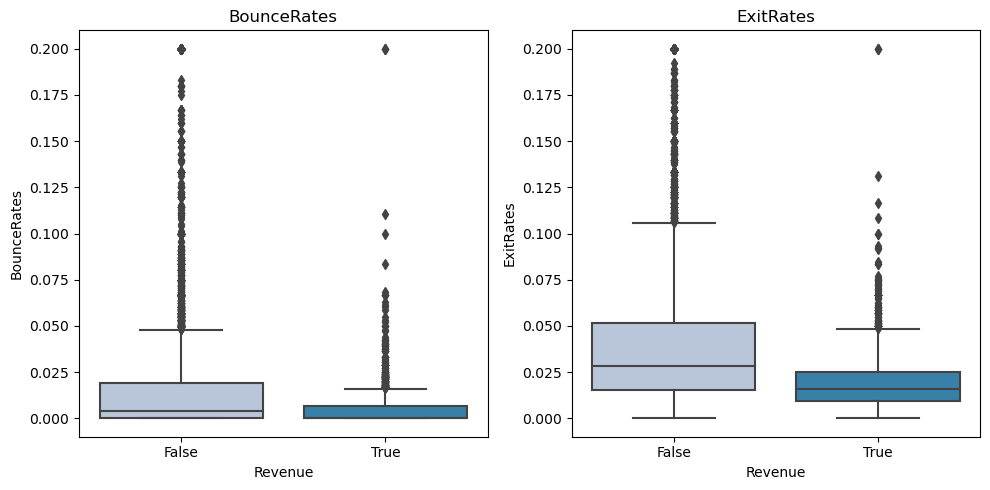

In [55]:


cols = data[['BounceRates','ExitRates']].columns.tolist()

plt.figure(figsize = (10,5))

for i,variable in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(x = data['Revenue'],y = data[variable],palette = 'PuBu')
    plt.title(variable)
    plt.tight_layout()
    
plt.show()

- it is logical that customers who leave the website without triggering any response on the servewr would not be contributing to the revenue, similar for exit rates.

# revenue vs pagevalues

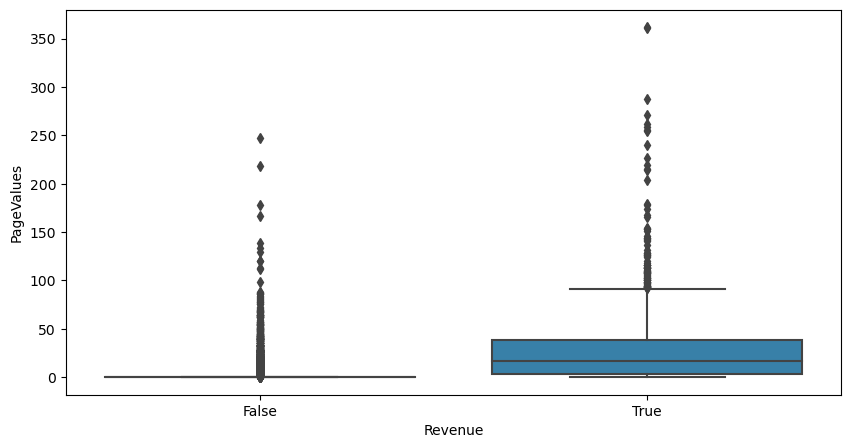

In [56]:
plt.figure(figsize = (10,5))
sns.boxplot(x = data['Revenue'],y = data['PageValues'],palette = 'PuBu')
plt.show()

- higher pagevalues means higher contribution to revenue

In [57]:
def stacked_plot(x):
    sns.set(palette = 'nipy_spectral')
    table = pd.crosstab(x,data['Revenue'],margins = True)
    print(table)
    print('-'*120)
    tab = pd.crosstab(x,data['Revenue'],normalize = 'index')
    tab.plot(kind = 'bar',stacked = True,figsize = (10,5))
    plt.legend(loc = 'lower left',frameon = False)
    plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
    plt.show()

Revenue     False  True    All
SpecialDay                    
0.0          9125  1831  10956
0.2           164    14    178
0.4           230    13    243
0.6           321    29    350
0.8           313    11    324
1.0           144    10    154
All         10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


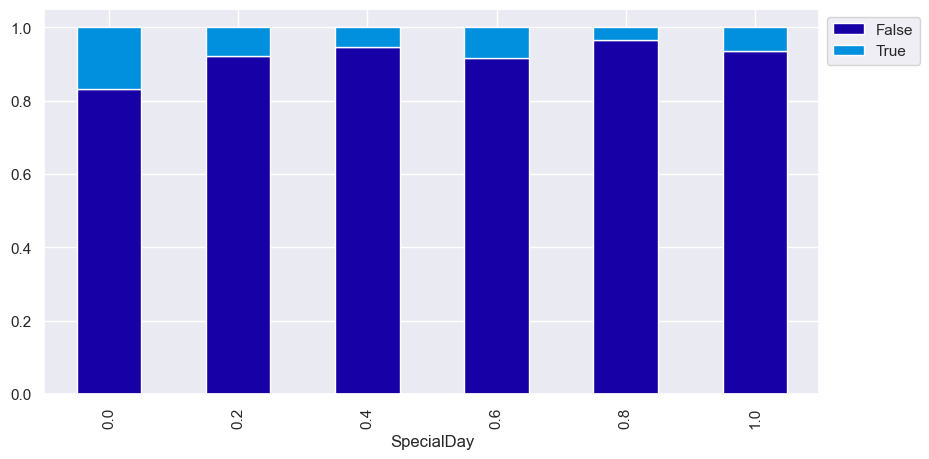

In [58]:
stacked_plot(data['SpecialDay'])

- regular days contribute more to the revenue instead of special occasions which is understandable as most days are non-special days.so, there are very few conversion sessions on special days.

# - revenue vs month

Revenue  False  True    All
Month                      
Aug        357    76    433
Dec       1490   216   1706
Feb        178     3    181
Jul        366    66    432
June       256    29    285
Mar       1668   192   1860
May       2964   365   3329
Nov       2222   760   2982
Oct        434   115    549
Sep        362    86    448
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


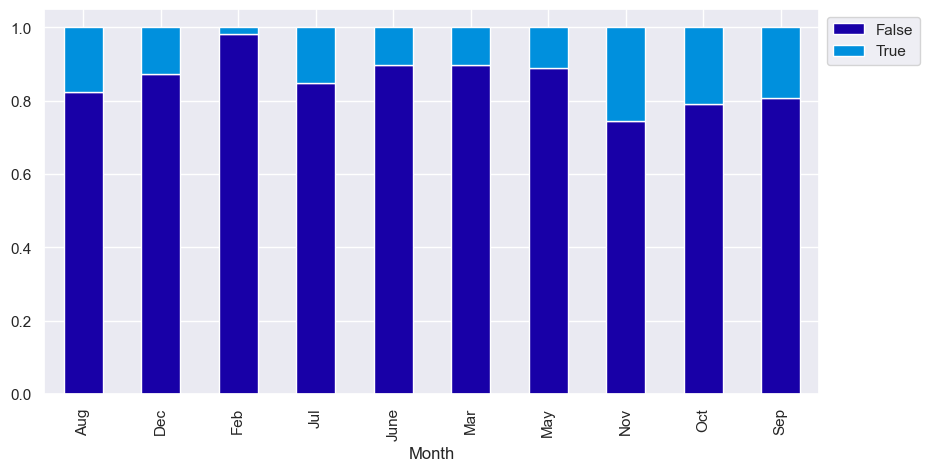

In [59]:
stacked_plot(data['Month'])

- nov and may are the months with largest contributions in revenue.
- there are lesser sessions in nov as compared to may but more conversions.

In [60]:
revenue_data = data[data['Revenue']==True]
revenue_data.groupby(['Month','SpecialDay'])['Revenue'].count()

Month  SpecialDay
Aug    0.0            76
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
Dec    0.0           216
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
Feb    0.0             1
       0.2             0
       0.4             0
       0.6             0
       0.8             1
       1.0             1
Jul    0.0            66
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
June   0.0            29
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
Mar    0.0           192
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
May    0.0           290
       0.2            14
       0.4            13
       

Revenue sessions on or around special day were only observed in May , this means website is not able to capitalize on the special occasions

# Revenue vs OperatingSystems

Revenue           False  True    All
OperatingSystems                    
1                  2170   379   2549
2                  5386  1155   6541
3                  2262   268   2530
4                   393    85    478
5                     5     1      6
6                    17     2     19
7                     6     1      7
8                    58    17     75
All               10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


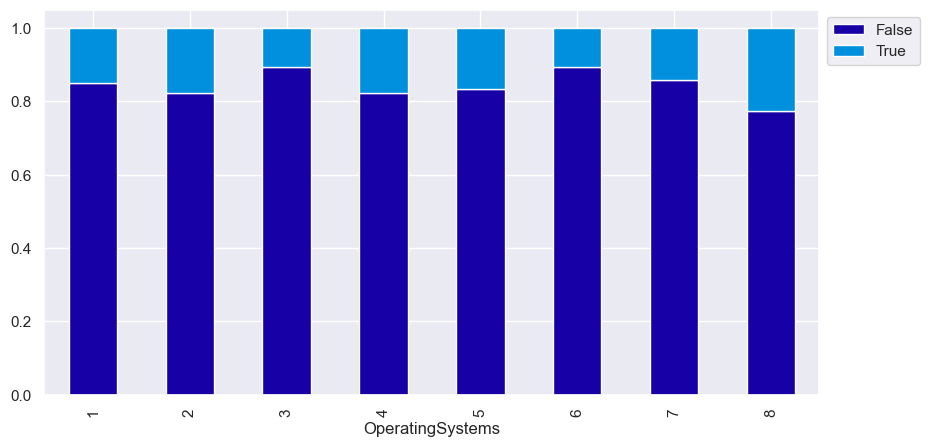

In [61]:
stacked_plot(data['OperatingSystems'])

 - customers using operating system 2 are the highest contributors to revenue ,approximately 20% (1155)

# Revenue vs Browser

Revenue  False  True    All
Browser                    
1         2062   365   2427
2         6660  1223   7883
3          100     5    105
4          601   130    731
5          379    86    465
6          154    20    174
7           43     6     49
8          114    21    135
9            1     0      1
10         131    32    163
11           5     1      6
12           7     3     10
13          40    16     56
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


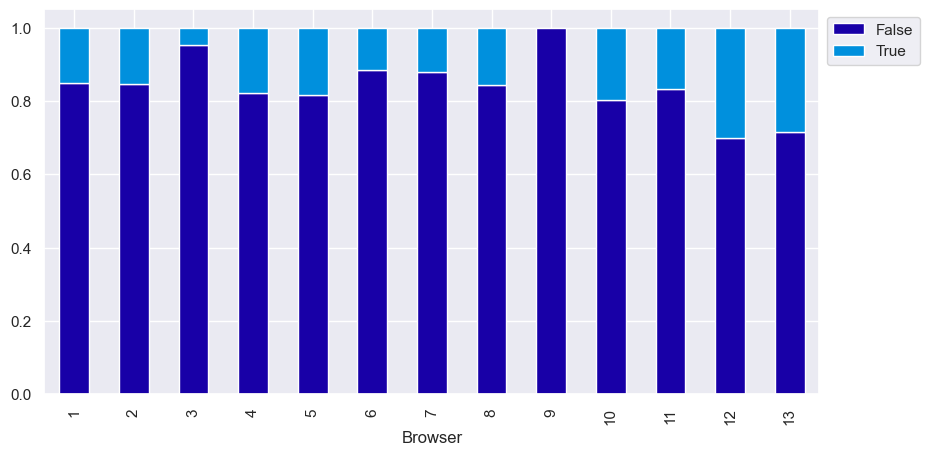

In [62]:
stacked_plot(data['Browser'])

- Approximately, 20%(1223 customers) of customers using browser 2 contribute to the revenue.

# Revenue vs Region

Revenue  False  True    All
Region                     
1         3943   771   4714
2          940   188   1128
3         2030   349   2379
4          996   175   1171
5          266    52    318
6          689   112    801
7          639   119    758
8          375    56    431
9          419    86    505
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


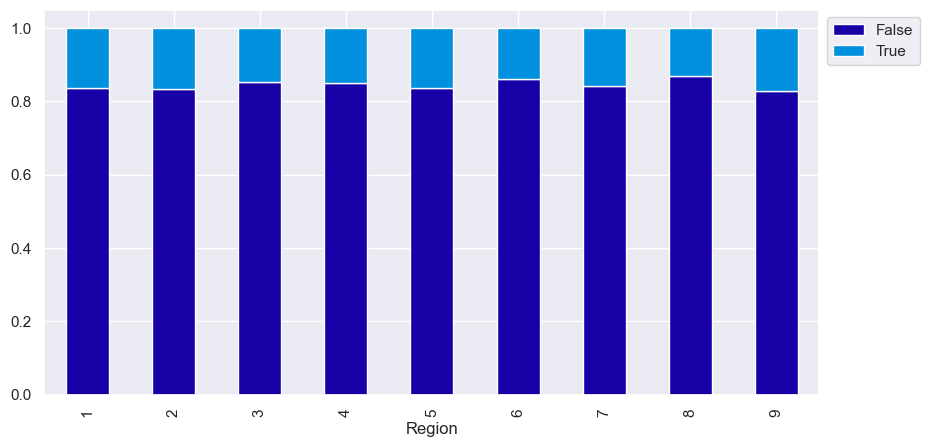

In [63]:
stacked_plot(data['Region'])

- we have similar distribution in regions.

# Revenue vs TrafficType

Revenue      False  True    All
TrafficType                    
1             2126   262   2388
2             3064   847   3911
3             1833   180   2013
4              901   165   1066
5              204    56    260
6              390    53    443
7               28    12     40
8              248    95    343
9               37     4     41
10             360    90    450
11             200    47    247
12               1     0      1
13             685    43    728
14              11     2     13
15              37     0     37
16               2     1      3
17               1     0      1
18              10     0     10
19              16     1     17
20             143    50    193
All          10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


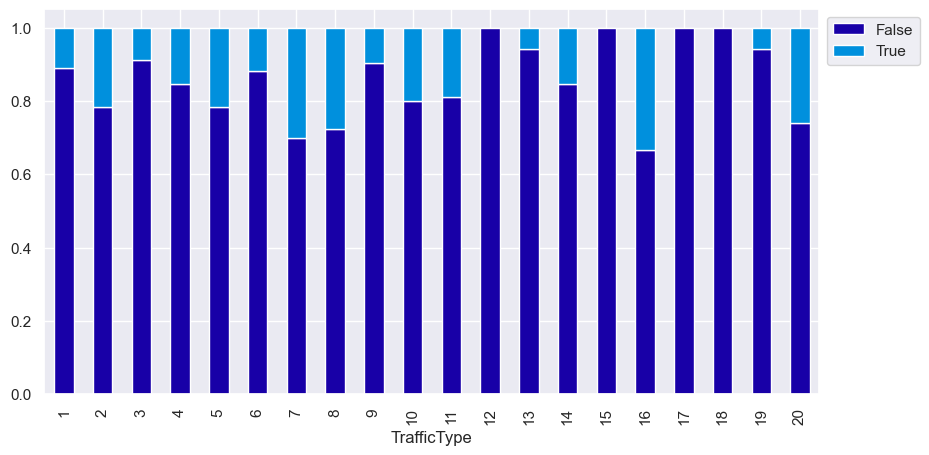

In [64]:
stacked_plot(data['TrafficType'])

- there is a varying pattern of revenue sessions among different traffic sources,although traffic coming source 2 has the highest proportion of revenue sessions.

# - Revenue vs VisitorType

Revenue            False  True    All
VisitorType                          
New_Visitor         1271   422   1693
Other                 65    16     81
Returning_Visitor   8961  1470  10431
All                10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


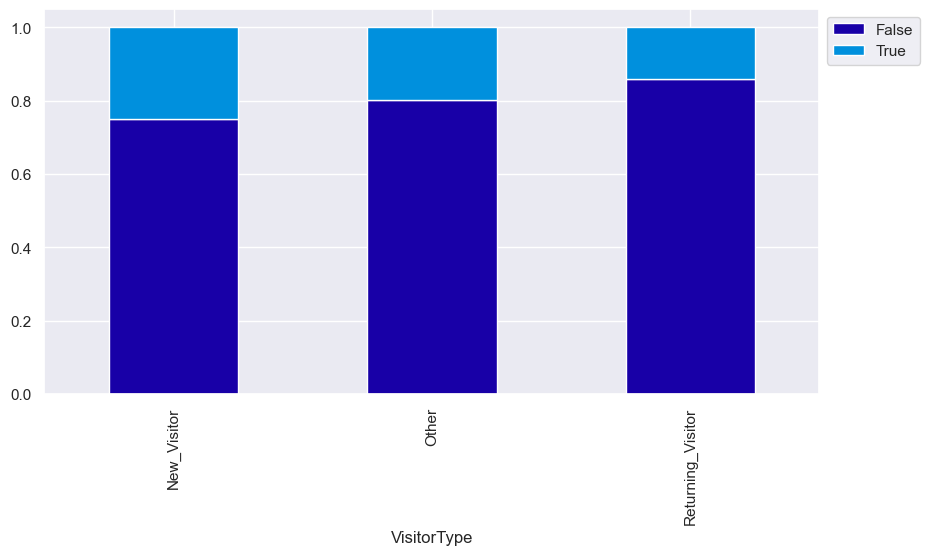

In [65]:
stacked_plot(data['VisitorType'])

- Returning visitors are the largest contributors to revenue.but interestingly, new visitors end up having more conversion sessions.

# Revenue vs Weekend 

Revenue  False  True    All
Weekend                    
False     7937  1409   9346
True      2360   499   2859
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


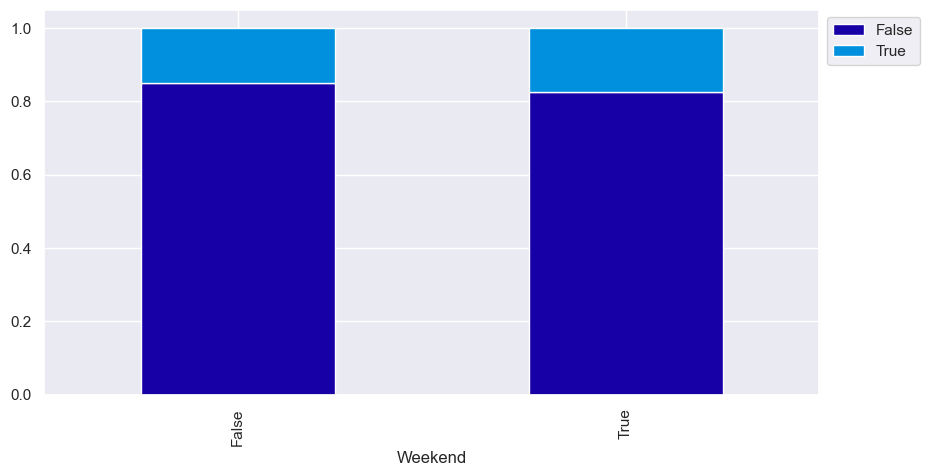

In [66]:
stacked_plot(data['Weekend'])

- there is not much difference in weekend and weekday sessions.

# Customer Level Analysis

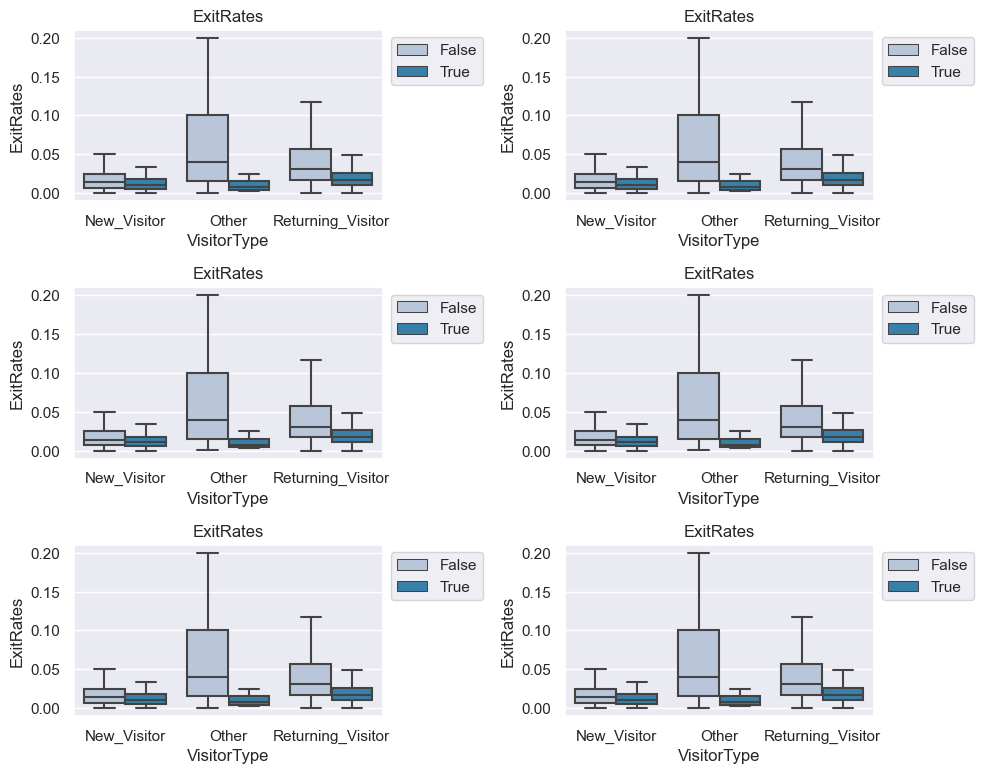

In [67]:
cols = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]
plt.figure(figsize = (10,10))

for i,variabe in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = data['VisitorType'],y =data[variable],hue = data['Revenue'],palette = 'PuBu',showfliers = False)
    plt.tight_layout()
    plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
    plt.title(variable)

- new visitors who have visited more administrative pages and spent more time on them have not contrbuted to revenue. This indicates that the administrative pages need to be more friendly and simplified.
- returning visitors visiting informational pages have contributed to revenue. This means that the informational pages are doing well to provide customers with all the required information.
- productrelated pages are doing a fair job.

VisitorType  New_Visitor  Other  Returning_Visitor    All
Month                                                    
Aug                   72      0                361    433
Dec                  334     58               1314   1706
Feb                    1      0                180    181
Jul                   54      0                378    432
June                  30      1                254    285
Mar                  232      0               1628   1860
May                  319      0               3010   3329
Nov                  419     22               2541   2982
Oct                  124      0                425    549
Sep                  108      0                340    448
All                 1693     81              10431  12205
------------------------------------------------------------------------------------------------------------------------


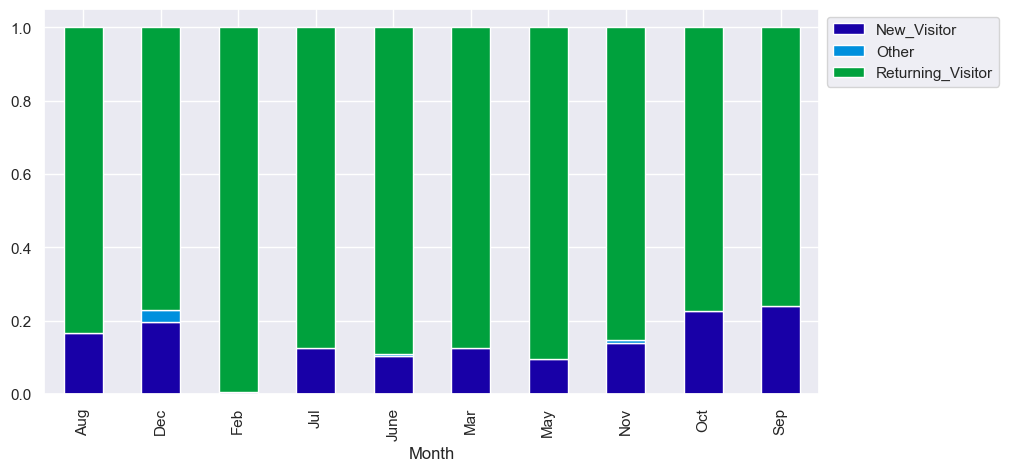

In [68]:
tab1 = pd.crosstab(data['Month'],data['VisitorType'],margins = True)
print(tab1)
print("-"*120)
tab =  pd.crosstab(data['Month'],data['VisitorType'],normalize = 'index')
tab.plot(kind = 'bar',stacked = True,figsize = (10,5))
plt.legend(loc='lower left',frameon = False)
plt.legend(loc ='upper left',bbox_to_anchor =(1,1))
plt.show()

- november and december saw most new customers, but the proportion of new customers to returning customers is highest in october and september.

# Data Preparation

In [69]:
dummy_data = pd.get_dummies(data,columns = ['Month','VisitorType','Weekend','Region','Browser','OperatingSystems','SpecialDay'],drop_first = True)

dummy_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  TrafficType  ...  OperatingSystems_4  \
0         0.20       0.20         0.0            1  ...                   0   
1         0.00       0.10         0.0            2  ...                   0   
2         0.20       0.20         0.0            3  ...                   1   
3         0.05       0.14         0.0            4  ...                   0   
4         0.02       0.05         0.0            4  ...                   0   

   OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_8  SpecialDay_0.2  SpecialDay_0.4  SpecialDay_0.6  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   

   SpecialDay_0.8  SpecialDay_1.0  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 55 columns]

## we could have used the labels directly but we are calling dummy variables here because if your categorical variable do not have a specific order to them, if I would have used the labels directly, my model would have given a higher weightage to value 1 as compared to value 0. because 1 >0.
 but if we see for all these categorical variables, order is not important. because no where it says that opperating system 2 is greater than operating system 1,
 but our data is created in such a way that i have operating system as 1,2,3,4,5,6,7,8 but i don't want to instill bias in the model, I can create dummy variables.


- one hot encoding is one way to deal with categorical variables.


# MODEL BUILDING APPROACH

1. Data Preparation
2. Partition the data into train and test set.
3. Build Naive Bayes model
4. Tune the model if required.
5. Test the data on test set.

In [70]:
col_names = list(dummy_data.columns)
col_names.remove('Revenue')   # keep only names of features after removing target variable
feature_names = col_names
print(feature_names)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'TrafficType', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0']


In [71]:
x = dummy_data.drop('Revenue',axis =1)  #features
y = dummy_data['Revenue'].astype('int64')   #labels (target variable)
# converting target to integers - since some functions might not work with bool type

In [72]:
# splitting data into training and testing set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
print(x_train.shape,x_test.shape)

(8543, 54) (3662, 54)


# BUILD NAIVE BAYES MODEL

In [74]:
# data scaling, standardization

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

ac = accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[ 806, 2268],
       [  43,  545]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.3689240851993446

In [81]:
accuracy_score(y_train,classifier.predict(x_train))

0.37129813882710994

In [ ]:
# under fitted model

#probably i need some more features to go ahead and build a better model

#maybe decision tree or random forest model can be a better choice here

# naive bayes model is a probabilistic model and is not very effective when it comes to complex data.

# it's assumptions of all the being non_correlated is not satisfied here.

# for a real time pov these models are very very fast